# THE HUMAN PROTEIN ATLAS

The Human Protein Atlas (HPA) is a Swedish initiative that was established in 2003, funded by the Knut
and Alice Wallenberg foundation. It aims to create a single platform containing a mapping of all human proteins 
in cells, tissues and organs. The data is collected using a combination of numerous omics techniques such as 
antibody-based imaging, mass spectrometry-based proteomics, transcriptomics and systems biology. Omics technologies 
informally refer to domains of study in biology such as genomics, proteomics or metabolomics. The most favorable 
part about the HPA is that it is open source - all the data is available for scientists in both academia and 
industry to find out about the human proteome. Even though the project is based in Sweden, it is
a collaborative effort between the Royal Institute of Technology in Stockholm, Uppsala University, 
Uppsala Akademiska University Hospital, and the Science for Life Laboratory based in both Uppsala and Stockholm. 
They also have formal collaborations with groups in India, South Korea, Japan, China, Germany, France, Switzerland, 
USA, Canada, Denmark, Finland, The Netherlands, Spain, and Italy; a truly international endeavor.

The HPA focuses on three aspects of genome-wide analysis of human proteins - the Tissue 
Atlas, Cell Atlas and Pathology Atlas. The Tissue Atlas shows the distribution of proteins across all major tissues
and organs in the human body. The Cell Atlas shows intracellular localization of proteins in single cells. Finally,  the Pathology Atlas shows the impact of protein levels for survival of cancer patients. 

In 2017, the project was deemed as one of the top 10 technologies that are changing society, especially because the work with the Pathology Atlas has been pivotal in the advancement of personalized cancer medicine. They have also contributed to work involving antibody detection, role of proteins in causing arthritis in cartilege and mortality due to liver diseases. More information is available through their [publications](https://www.proteinatlas.org/about/publications). The HPA have also teamed up with the Chan Zuckerberg Initiative to strengthen research in cell biology.

This informative [video](https://www.youtube.com/watch?v=GUvHrs5lKtU) provides even more background about this project.

The HPA has grown and evolved over time. As seen in the visualization below, there are presently approximately 26,000 antibodies and 15,000 genes accounted for.

<img src="growth.png" alt="Drawing" style="width: 900px;"/>

This tutorial will describe the Tissue Atlas, Cell Atlas and the Pathology Atlas. All the open source data is provided on the HPA website and is available to download [here](https://www.proteinatlas.org/about/download).

The aim of the tutorial is to explain some tasks that can be carried out using some example datasets provided by the HPA. Understanding the biological techniques behind the data collection is beyond the scope of this tutorial. We assume a base level of familiarity with Python, Pandas and Numpy.

We will work with the Normal Tissue Data, Subcellular Location Data and Pathology Data (all these datasets are available in TSV format).

If you have not done so already, use the package manager [pip](https://pip.pypa.io/en/stable/) to download the following packages that we will use.
    
* Packages: 
  * [Numpy](http://www.numpy.org/)
  * [Pandas](https://pandas.pydata.org/)
  * [Matplotlib](https://matplotlib.org/)
  * [Svglib](https://pypi.python.org/pypi/svglib/)
  * [reportLab](https://pypi.python.org/pypi/reportlab)
        
Each section of the tutorial provides a brief explanation, followed by code that executes the command or calculation we aim to complete. Below that you will find the corresponding answers or graphs that you should obtain when running the code. Wherever there are paths to files, make sure you use relative paths to where you have saved the file on your local machine (i.e. do not use the paths provided because they probably will not work for you).

NOTE: ignore the warning text that appears in the pink box below (generated by a line required to correctly display visualizations)


In [1]:
# Set up by importing all the necessary packages
import csv
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

All the data used in this tutorial is available for download in the [Downloadable Data](https://www.proteinatlas.org/about/download) section of the HPA website.

## THE TISSUE ATLAS
The Tissue Atlas contains information about the expression and localization of human proteins found across tissues
and organs. In total, there are 76 cell types, that correspond to 44 human tissue types that have been manually 
analyzed and presented as a histology-based annotation of protein expression levels (a histology is the study 
of the microscopic structure of tissues).


### Tissue Tutorial

The Normal Tissue Data contains expression profiles for proteins in human tissues. This file includes Ensembl gene identifier ("Gene"), tissue name ("Tissue"), annotated cell type ("Cell type"), expression value ("Level"), and the gene reliability of the expression value ("Reliability") - these features appear as columns in the table. 

The reliability score is set manually for all genes and is based on the set of normal tissues analyzed - it indicates the level of reliability of the analyzed protein expression pattern. The score is split into 4 categories - "Enhanced", "Supported", "Approved", or "Uncertain".

To begin deriving information and creating visualizations from the dataset, we need to convert it into a usable format. We will transform the TSV file into a Pandas Dataframe, which will be far more useful for the data analysis that we want to carry out.

The code below reads the table directly into a Pandas Dataframe. We count the number of genes by extracting the name of the gene on every row of the table, adding it to a set, and displaying the size of the set (which will now indicate the number of genes in this dataset). 

Similarly, building a dictionary that maps the tissue name to the number of times it occurs in the dataset allows us to graph the frequencies. This information would help us identify the most commonly affected tissue, and inform future research.

We can also exploit the Pandas Dataframe to find how many expression values we can obtain for each level. This will allow us to discern whether or not certain tests are worth pursuing (i.e. if too many expression values indicate "Not detected", it may not be worthwhile investing time and effort into using those genes). We have completed the code for "Not Detected", it is your task to fill in the code for "High", "Medium" and "Low". Make sure your values match the reference solutions below!

The code uses the get() Method - refer to the [documentation](http://www.tutorialspoint.com/python/dictionary_get.htm) to get a better idea of how it works.

Number of Genes:  13206
Number of Not Detected:  458973
Number of Low:  0
Number of Medium:  0
Number of High:  0


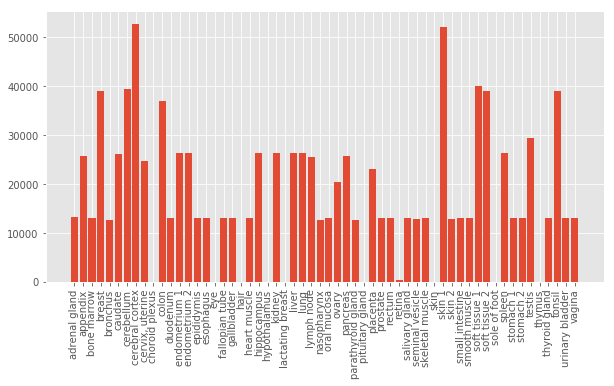

In [2]:
# Change the path to direct to the file on your local machine
tissue_path = 'normal_tissue.tsv'

# Reads the table into a Pandas Dataframe
result = pd.read_table(tissue_path)

# Set used to count the genes
all_genes = set()

# Dictionary mapping tissues to their frequency
tissue = dict()

# Iterating over rows in the dataframe 
for (index, row) in result.iterrows():
    cur_gene = row['Gene'] # name of the gene on the current row
    all_genes.add(cur_gene) # adding the gene to the set of all genes
    
    target = row['Tissue'] # name of the tissue on the current row
    
    # the get function will return None if the value 
    # does not exist in the yet, or the value if it does
    # refer to the documentation linked above for 
    # a better understanding
    cur_val = tissue.get(target) 
    if (cur_val == None):
        # did not exist in the dictionary, so we add it
        tissue[target] = 1
    else:
        # existed in the dictionary, so we increment the count
        tissue[target] += 1

number_of_genes = len(all_genes)
print("Number of Genes: ", number_of_genes)

num_nd = sum(result['Level'] == 'Not detected')
# Fill in the rest (i.e. replace the 0 placeholder on each line)
num_low = 0
num_med = 0
num_high = 0

print("Number of Not Detected: ", num_nd)
print("Number of Low: ", num_low)
print("Number of Medium: ", num_med)
print("Number of High: ", num_high)

# Use the tissue dictionary that was built to plot tissue frequencies
x = tissue.keys()
y = tissue.values()
plt.xticks(rotation='vertical')
plt.bar(x, y)
plt.show()


### Tissue Tutorial Reference Solution

Number of Genes: 13206

Number of Not Detected: 458973

Number of Low: 181967
    
Number of Medium: 292667
    
Number of High: 119723
    
#### Tissue Frequencies
<img src="genes.png" alt="Drawing" style="width: 800px;"/>


## THE CELL ATLAS

The Cell Atlas contains images that detail about the spatial distribution of intra-cellular proteins. The images 
are annotated in terms of spatial distribution to 33 different cellular structures representing 14 major 
organelles and the annotated locations for every protein are classified as main and additional, and assigned 
a reliability score.

### Cell Tutorial

For the cell tutorial we will work with the Subcellular Location Dataset. This contains the subcellular localization of proteins. The file has the following columns: Ensembl gene identifier ("Gene"), name of gene ("Gene name"), gene reliability score ("Reliability"), enhanced locations ("Enhanced"), supported locations ("Supported"), Approved locations ("Approved"), Uncertain locations ("Uncertain"), locations with single-cell variation in intensity ("Single-cell variation intensity"), locations with spatial single-cell variation ("Single-cell variation spatial"), locations with observed cell cycle dependency (type can be one or more of biological definition, custom data or correlation) ("Cell cycle dependency"), Gene Ontology Cellular Component term identifier ("GO id") - once again, each of these attributes is a column in the dataset provided.

The "Reliability" column informs which locations columns is populated (i.e. one of "Enhanced", "Supported", "Approved" or "Uncertain" will contain a value, depending on the value of the "Reliability" column).

The code below shows how to count the frequency of each "Reliability" level, saved in a dictionary. We also find the mapping between a gene and its corresponding "Approved" location. From this curated information, we identify which gene has the most "Approved" locations. Using the code provided, repeat the process to find which gene has the most "Enhanced", "Supported" and "Uncertain" locations.


{'ENSG00000254221'}
6


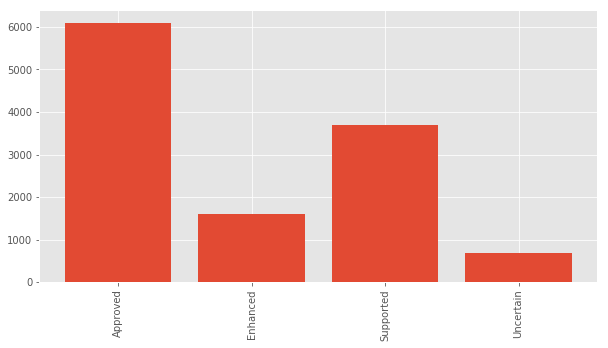

In [4]:
# Change the path to direct to the file on your local machine
cell_path = 'subcellular_location.tsv'

# Reads the table into a Pandas Dataframe
result = pd.read_table(cell_path)

# Dictionary for Reliability level frequencies
num_reliabilities = dict()
# Dictionary for genes and corresponding locations
location_mapping = dict()

# Iterating over rows in the dataframe 
for (index, row) in result.iterrows():
    cur_reliability = row['Reliability'] # Reliability value on current row
    reliability_count = num_reliabilities.get(cur_reliability)

    # Updating the frequency count of various reliability values
    # based on the get function (refer to documentation linked above)
    if (reliability_count == None):
        num_reliabilities[cur_reliability] = 1
    else:
        num_reliabilities[cur_reliability] += 1

    cur_gene = row['Gene']
    testing_location = 'Approved'
    # Finding each gene and the location we are interested in 
    if (cur_reliability == testing_location):
        location_values = row[cur_reliability]
        # must ensure location_values are not empty and are strings
        if ((location_values != '') and (type(location_values) == str)):
            # By looking at the dataset, we see that locations are semi-colon separated
            locations = location_values.split(";")
            # Check get() method documentation from link above if needed
            checker = location_mapping.get(cur_gene)
            if (checker == None):
                location_mapping[cur_gene] = locations
            else:
                location_mapping[cur_gene] += locations

# Finding the gene with the most Approved Locations
cur_max = 0 # Running current maximum value
max_genes = set() # Set of genes that have this number of locations
for (key, value) in location_mapping.items():
    cur_len = len(value)
    # reset the max if something larger is found
    if (cur_len > cur_max): 
        cur_max = cur_len
        max_genes = set()
        max_genes.add(key)
    # append to the list of genes if another one 
    # with the same number of genes is found
    if (cur_len == cur_max): 
        max_genes.add(key)

print(max_genes)
print(cur_max)

# Repeat the process to find which gene has the most Enhanced, Supported and Uncertain locations

# Plotting Reliability value frequencies
x = num_reliabilities.keys()
y = num_reliabilities.values()
plt.xticks(rotation='vertical')
plt.bar(x, y)
plt.show()


### Cell Tutorial Reference Solution

Gene(s) with maximum number of Approved Locations: {'ENSG00000254221'}

Number of Approved Locations: 6

Gene(s) with maximum number of Enhanced Locations: {'ENSG00000050405', 'ENSG00000146038', 'ENSG00000082898', 'ENSG00000088325'}

Number of Enhanced Locations: 4

Gene(s) with maximum number of Supported Locations: {'ENSG00000105364'}

Number of Supported Locations: 5

Gene(s) with maximum number of Uncertain Locations: {'ENSG00000170310', 'ENSG00000256514', 'ENSG00000175482', 'ENSG00000185274'}

Number of Uncertain Locations: 4

#### Reliability Frequencies
<img src="rels.png" alt="Drawing" style="width: 600px;"/>

The HPA also provides a schematic of a cell that has been annotated with the structures included in the Human Protein Atlas. This is a great visual and interactive tool for beginners learning about HPA.

The code shows how to save the SVG (Scalable Vector Graphics) file into PDF format so that it can be used by individuals who cannot view SVGs. 

Make sure that the [Svglib](https://pypi.python.org/pypi/svglib/) and [reportLab](https://pypi.python.org/pypi/reportlab) packages are downloaded and that you have the file on your local machine.

In [5]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM

# Change the path to direct to the file on your local machine
path = "cell.svg"
drawing = svg2rlg(path)
renderPDF.drawToFile(drawing, "cell.pdf")

The image of the cell looks like this:

<img src="cell.png" alt="Drawing" style="width: 500px;"/>


## THE PATHOLOGY ATLAS
The Pathology Atlas is based on a systems-based analysis of the transcriptome of 17 main cancer types 
using data from 8,000 patients. The research contains numerous findings related to cancer biology and treatment. Many genes are expressed differently in cancers, and a large proportion of them have a direct impact on overall patient survival. Gene expression patterns of individual tumors vary considerably, and could exceed the variation observed between different cancer types. This project allowed for the development of personalized genome-scale metabolic models for cancer patients to identify culprit genes involved in tumor growth.

### Pathology Tutorial
The Pathology data contains staining profiles for proteins in human tumor tissue. It includes the Ensembl gene identifier ("Gene"), gene name ("Gene name"), tumor name ("Cancer"), number of patients annotated for different staining levels ("High", "Medium", "Low" & "Not detected") and log-rank p values for patient survival and mRNA correlation ("prognostic - favourable", "unprognostic - favourable", "prognostic - unfavourable", "unprognostic - unfavourable") - these are columns in the dataset.
 
Instead of reading directly into a Pandas Dataframe as we did for the previous tutorials, we use a CSV reader (another way to parse the large table).

Since the dataset provided is a TSV (tab separated values) file, we specify that the delimiter we want to use with the CSV reader is tabs. To see that each row is being accounted for, and that this way of reading the data is identical, we keep track of a row counter. As before, we count the number of genes that are being analyzed. In the code below, you are shown how to calculate the number of patients who had "High" staining levels for each type of cancer, and this is displayed as a histogram. Once again, determining staining level can help to identify what genes to carry out further research on. Understand the code, and replicate it for "Medium", "Low" and "Not detected" levels of staining. Make sure that the values you obtain, and corresponding graphs match the ones shown in the reference solutions.


Number of Rows:  306336
Number of Genes: 15317


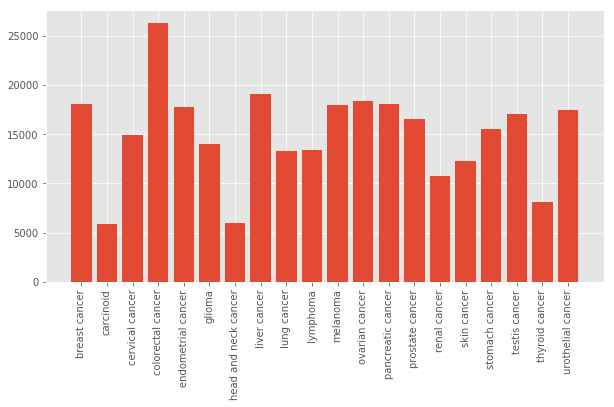

In [6]:
# Change the path to direct to the file on your local machine
pathology_path = 'pathology.tsv'

with open(pathology_path) as tsvfile:
    # Note the corrected delimiter value
    reader = csv.reader(tsvfile, delimiter='\t')
    row_count = 0
    
    # Set used to count the genes
    all_genes = set()
    # Dictionary used to create mapping between tissue and high staining level
    highs = dict()

    # Iterating over rows
    for row in reader:
        cur_gene = row[0]
        cancer_type = row[2]
        high = row[3]

        # Ignore invalid values
        # want high to be an integer that 
        # indicates how many high staining levels were found
        if (high != 'High' and high != ''):
            row_count += 1
            all_genes.add(cur_gene)
            cur_high = highs.get(cancer_type)

            if (cur_high == None):
                highs[cancer_type] = int(high)
            else:
                highs[cancer_type] += int(high)

    print("Number of Rows: ", row_count)
    print("Number of Genes:", len(all_genes))
    
    names = highs.keys()
    high_vals = highs.values()
    
    # Plotting code
    plt.bar(names, high_vals)
    plt.xticks(rotation='vertical')
    plt.show()

### Pathology Tutorial Reference Solution

Number of Rows: 306336

Number of Genes: 15317

#### High Staining Level
<img src="highs.png" alt="Drawing" style="width: 600px;"/>

#### Medium Staining Level
<img src="meds.png" alt="Drawing" style="width: 600px;"/>

#### Low Staining Level
<img src="lows.png" alt="Drawing" style="width: 600px;"/>

## Further Resources
The existence of this dataset is invaluable as it could help direct future research in the domain of healthcare. 

We hope you can come up with ways to analyze the dataset by using more attributes in the dataset, harnessing a combination of Numpy, Pandas etc.

To learn more about using the Human Protein Atlas, follow the links below:

* [Human Protein Atlas](https://www.proteinatlas.org/about/help): HPA FAQs
* [Using the Tissue Atlas](https://atlasantibodies.com/#!/how-to-use-the-tissue-atlas): Navigating the Tissue Atlas interface
* [Human Protein Atlas in R](https://www.bioconductor.org/packages/3.7/bioc/vignettes/hpar/inst/doc/hpar.html): For users more comfortable using R

It may be helpful to read the sources used to compile this tutorial (refer below).

## Citations
* [https://www.proteinatlas.org/about](https://www.proteinatlas.org/about): About the HPA
* [https://www.proteinatlas.org/about/download](https://www.proteinatlas.org/about/download): Downloadable Data
* [https://en.wikipedia.org/wiki/Omics](https://en.wikipedia.org/wiki/Omics): Definition of Omics
* [https://www.genenames.org/](https://www.genenames.org/): Gene-naming conventions
* [https://www.proteinatlas.org/about/press+room](https://www.proteinatlas.org/about/press+room): Recent news about HPA